In [83]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import re, os, glob

In [111]:
def comp(means, stds):
    mean = means.mean(0)
    N = 14
    std = np.sqrt(((N - 1) * (np.power(stds, 2).sum(0)) + N * np.power(means - mean, 2)).sum(0) / (N * stds.shape[0] - 1))
    return mean, std

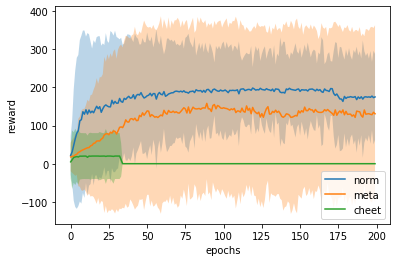

In [112]:
folders = ["c/norm/*/sco*", "c/meta/*/sco*","c/cheet/*/sco*"]
for folder in folders:
    files = glob.glob(folder)
    means = np.zeros([20,200])
    stds = np.zeros([20,200])
    for j, file in enumerate(files):
        with open(file, 'r') as f:
            f.readline()
            lines = f.readlines()
            length = len(lines)
        for i, line in enumerate(lines):
            means[j,i], stds[j,i] = map(float, line.split("\t")[3:6:2])

    mean, std = comp(means, stds)
    plt.plot(range(200), mean, label=folder[2:-7])
    plt.fill_between(range(200), mean-std, mean+std, alpha=0.3)
    plt.ylabel("reward")
    plt.xlabel("epochs")
    plt.legend(loc='lower right')
    #break